# ----------- Machine Learning - Modelos Não Supervisionados ----------------------

### Vamos treinar e interpretar o algorítmo K-Means:

O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k

Exemplo do algoritmo funcionando

http://tech.nitoyon.com/en/blog/2013/11/07/k-means/


In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.amazonaws.com/treinamento-big-data/imagens/kmeans_01.png", width=800, height=800)

#### K-Means Scikit:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Leitura da tabela de modelagem

In [6]:
import pandas as pd
df00 = pd.read_csv('clustering.csv')

df00.head()

,x0,x1,x2,x3
0,-0.450370,-2.244377,-0.499678,-1.163607
1,1.866159,-1.180407,1.898348,-1.072512
2,-1.731385,0.248746,0.177045,-1.618708
3,-2.211184,-0.066280,0.748191,-0.967796
4,0.739455,1.762124,2.319210,2.080270


#### Visualização dos dados

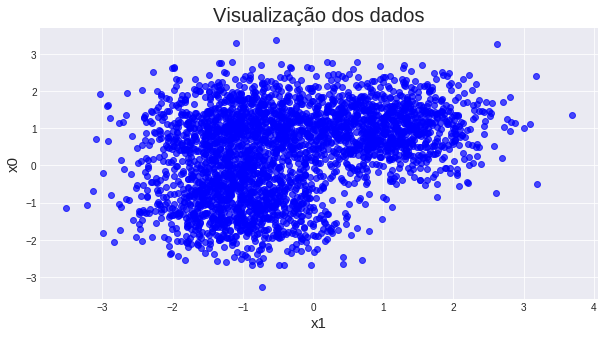

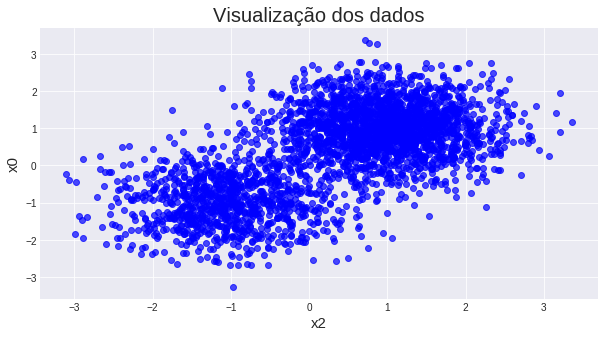

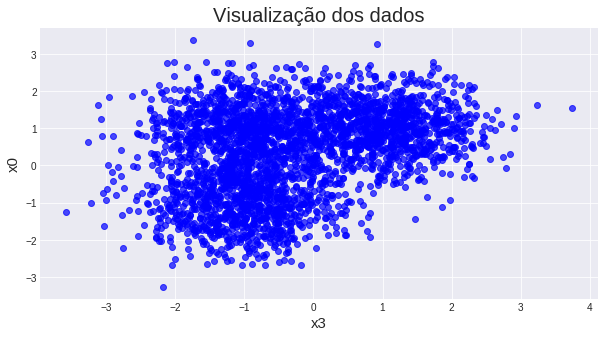

In [47]:
import matplotlib.pyplot as plt
import numpy as np

y = df00[['x0']]
x = df00[['x1']]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.scatter(x, y, c = "b", alpha = 0.7)

plt.xlabel('x1', fontsize=15)
plt.ylabel('x0', fontsize=15)
plt.title('Visualização dos dados', fontsize=20)
    
plt.show()

y = df00[['x0']]
x = df00[['x2']]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.scatter(x, y, c = "b", alpha = 0.7)

plt.xlabel('x2', fontsize=15)
plt.ylabel('x0', fontsize=15)
plt.title('Visualização dos dados', fontsize=20)
    
plt.show()

y = df00[['x0']]
x = df00[['x3']]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.scatter(x, y, c = "b", alpha = 0.7)

plt.xlabel('x3', fontsize=15)
plt.ylabel('x0', fontsize=15)
plt.title('Visualização dos dados', fontsize=20)
    
plt.show()

#### Verificação da quantidade ótima de clusters - Método Elbow

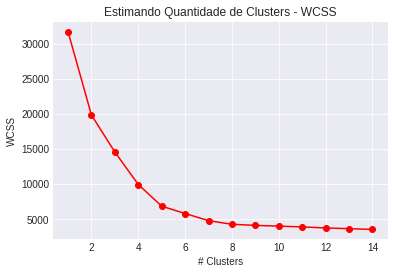

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
qtd_clus = []
for ii in range( 1, 15 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(df00)
    wcss.append( kmeans.inertia_ )
    qtd_clus.append( ii )

plt.plot(qtd_clus, wcss, 'ro-', label="WCSS")
plt.title("Estimando Quantidade de Clusters - WCSS")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
# Instalando seaborn (Não é recomendado instalar por aqui, o ideal é fazer via terminal de acesso SSH ao cluster)
# import sys
# !{sys.executable} -m pip install seaborn

#### Verificação da quantidade ótima de clusters - Método Silhueta

Text(0, 0.5, 'Qualidade da Clusterizacao')

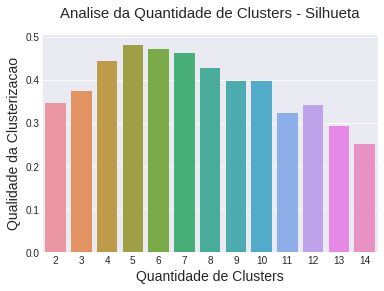

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X = df00
silcoef = []
qtd_clus = []

for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silcoef.append(sil_coeff)
    qtd_clus.append(n_cluster)

pos_clus = max(enumerate(silcoef), key=(lambda x: x[1]))[0]  
qt_clus = qtd_clus[pos_clus]


import seaborn as sns
import matplotlib.pyplot as plt

df_coefsil = pd.DataFrame(silcoef, columns=['coefsil'])
df_clus = pd.DataFrame(qtd_clus, columns=['nclus'])
dfsil = df_coefsil.merge(df_clus, left_index=True, right_index=True, how = 'inner')    

ax = sns.barplot(x="nclus",y='coefsil', data=dfsil)
plt.title('Analise da Quantidade de Clusters - Silhueta', y=1.05, size=15)
plt.xlabel('Quantidade de Clusters', fontsize=14)
plt.ylabel('Qualidade da Clusterizacao', fontsize=14) 

#### Com base nos dois estudos apresentados podemos determinar que o número ótimo de clusters é k = 5

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,
                precompute_distances='auto', 
                verbose=0, 
                random_state=None, 
                copy_x=True, 
                n_jobs=None, 
                algorithm='auto')

y_pred = kmeans.fit_predict(df00)
# Vamos marcar os clusters na base (escorar)
df00["cluster"] = y_pred
cols = list(df00.columns)

In [39]:
df00.head()

,x0,x1,x2,x3,cluster
0,-0.450370,-2.244377,-0.499678,-1.163607,4
1,1.866159,-1.180407,1.898348,-1.072512,3
2,-1.731385,0.248746,0.177045,-1.618708,4
3,-2.211184,-0.066280,0.748191,-0.967796,4
4,0.739455,1.762124,2.319210,2.080270,0


### Vamos fazer em 2D para visualizar os clusters 

In [115]:
# Filtrando variaveis desejadas para clusterização
df01 = df00[['x0','x3']]

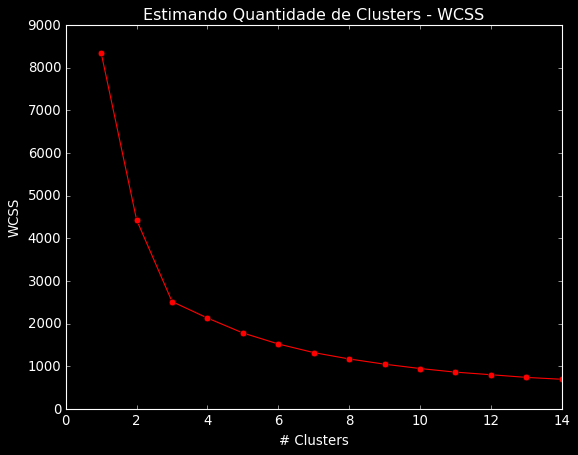

In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
qtd_clus = []
for ii in range( 1, 15 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(df01)
    wcss.append( kmeans.inertia_ )
    qtd_clus.append( ii )

plt.plot(qtd_clus, wcss, 'ro-', label="WCSS")
plt.title("Estimando Quantidade de Clusters - WCSS")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()

In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                max_iter=5, 
                tol=0.0001,
                precompute_distances='auto', 
                verbose=0, 
                random_state=None, 
                copy_x=True, 
                n_jobs=None, 
                algorithm='auto')

y_pred = kmeans.fit_predict(df01)
# Vamos marcar os clusters na base (escorar)
#df01["cluster"] = y_pred
# cols = list(df01.columns)

#### Análise visual dos clusters gerados

Text(0.5, 1.0, 'K-Means (K=3)')

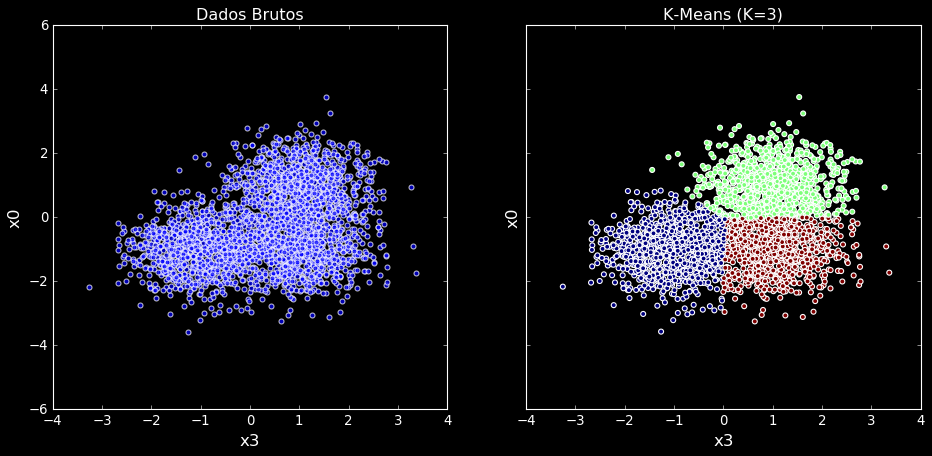

In [125]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

ax1.scatter(df01['x0'], df01['x3'], c = "b", alpha = 0.7)

ax1.set_xlabel('x3', fontsize=15)
ax1.set_ylabel('x0', fontsize=15)
ax1.set_title('Dados Brutos')


ax2.scatter(df01['x0'], df01['x3'], c=y_pred)
ax2.set_xlabel('x3', fontsize=15)
ax2.set_ylabel('x0', fontsize=15)
ax2.set_title("K-Means (K=3)")